<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №1 ФЭФМ МФТИ</b></h3>

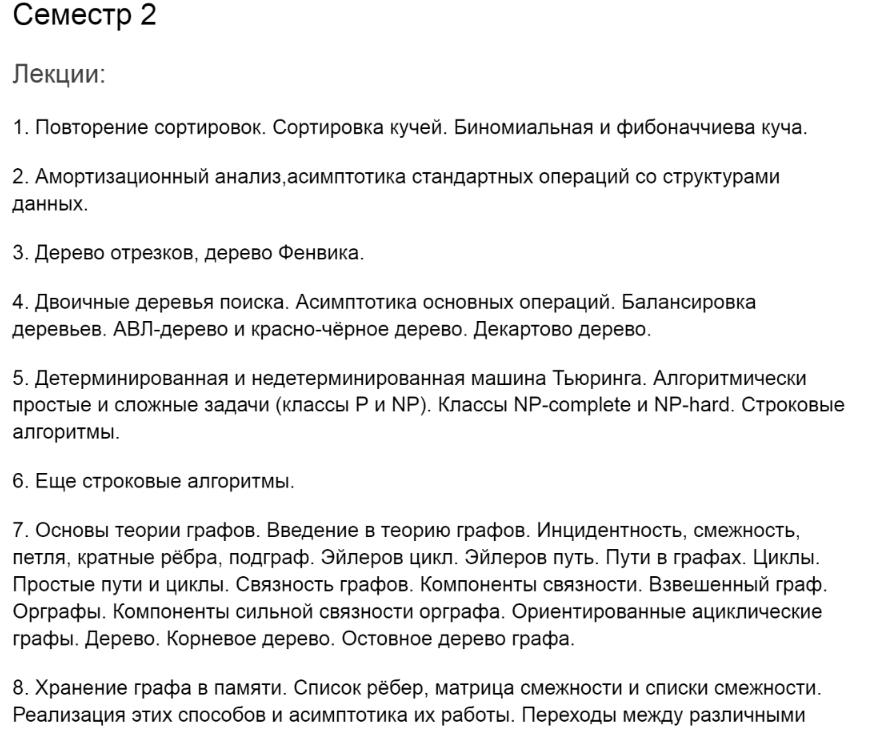

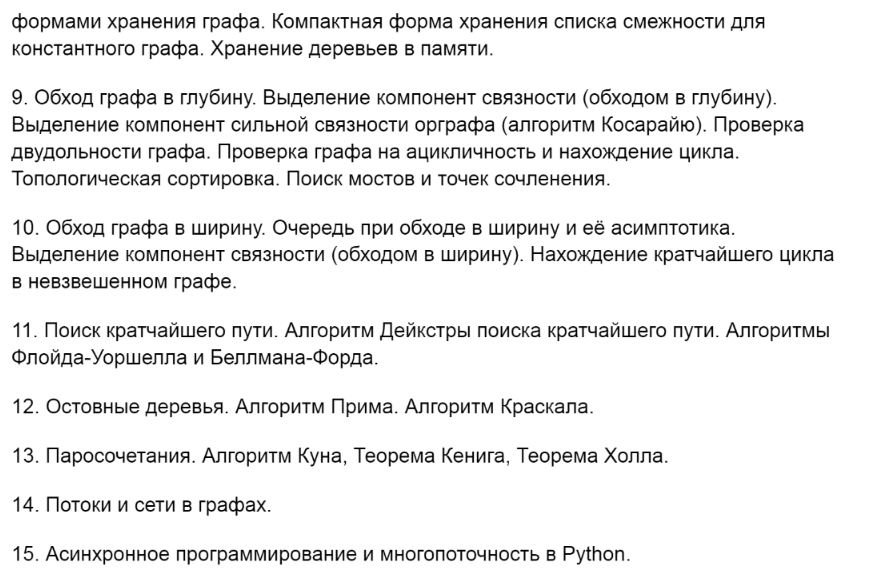

## Cортировка 
-- это упорядочивание элементов в списке или массиве. В случае, когда элемент списка имеет несколько полей, поле, служащее критерием порядка, называется ключом сортировки. На практике в качестве ключа часто выступает число, а в остальных полях хранятся какие-либо данные, никак не влияющие на работу алгоритма

### Алгоритмы сортировки оцениваются по скорости выполнения и эффективности использования памяти:

Время — основной параметр, характеризующий быстродействие алгоритма. Называется также вычислительной сложностью. Для упорядочения важны худшее, среднее и лучшее поведение алгоритма в терминах мощности входного множества A. Если на вход алгоритму подаётся множество A, то обозначим n = |A|. Для типичного алгоритма хорошее поведение — это O(n log(n)) и плохое поведение — это O(n2). Идеальное поведение для упорядочения — O(n). Алгоритмы сортировки, использующие только абстрактную операцию сравнения ключей всегда нуждаются по меньшей мере в O(n log(n)) сравнениях.
Память — ряд алгоритмов требует выделения дополнительной памяти под временное хранение данных. Как правило, эти алгоритмы требуют O(log(n)) памяти. При оценке не учитывается место, которое занимает исходный массив и независящие от входной последовательности затраты, например, на хранение кода программы (так как всё это потребляет O(1)). Алгоритмы сортировки, не потребляющие дополнительной памяти, относят к сортировкам на месте.

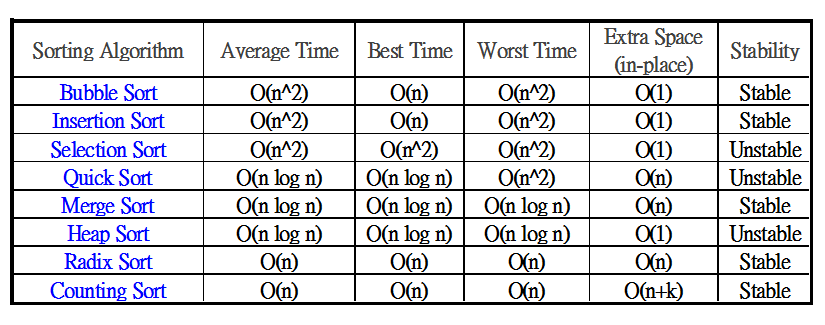

### Оптимальность O(n log(n))
Задача сортировки в общем случае предполагает, что единственной обязательно наличествующей операцией для элементов является сравнение.

Пусть по ходу работы алгоритмом производится k сравнений. Ответом на сравнение двух элементов a и b может быть один из двух вариантов ( a<b или a>b). Значит, всего возможно 2k вариантов комбинаций ответов на k вопросов.

Количество перестановок из n элементов равно n!. Для того, чтобы можно было провести сюръекцию из множества ответов на сравнения на множество перестановок, количество сравнений должно быть не меньше, чем log2(n!) (это обеспечивается тем, что сравнение — единственная разрешённая операция).

Прологарифмировав формулу Стирлинга, можно обнаружить, что log2(n!) = O(n log(n))


### Устойчивость 
— устойчивая сортировка не меняет взаимного расположения элементов с одинаковыми ключами.
### Естественность поведения 
— эффективность метода при обработке уже упорядоченных или частично упорядоченных данных. Алгоритм ведёт себя естественно, если учитывает эту характеристику входной последовательности и работает лучше.

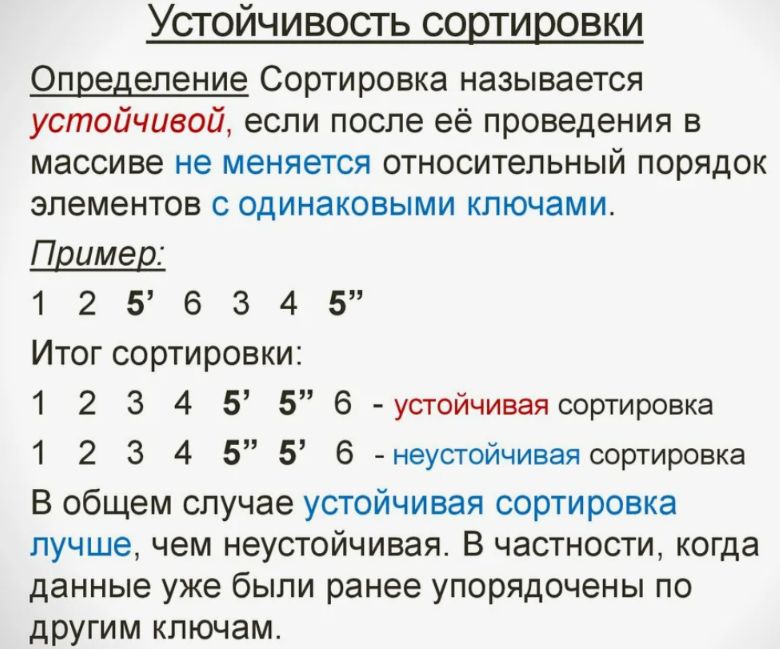

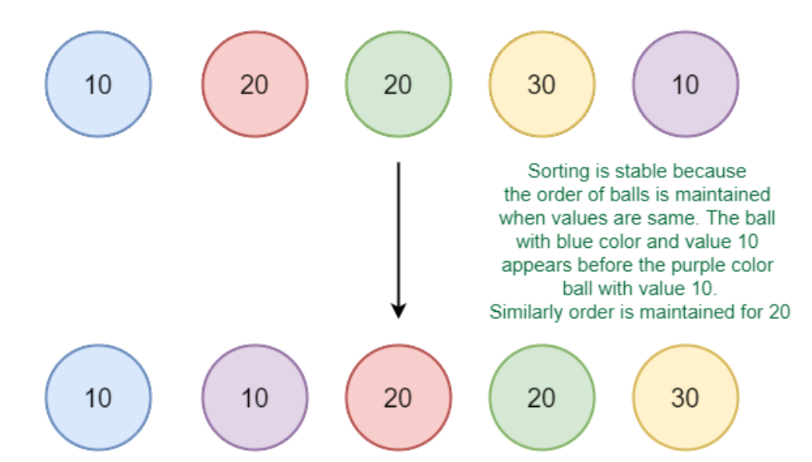

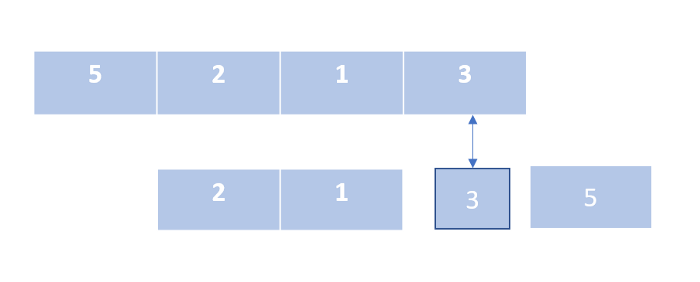

In [123]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]  
    left = [x for x in arr if x < pivot] 
    middle = [x for x in arr if x == pivot] 
    right = [x for x in arr if x > pivot]  
    return quicksort(left) + middle + quicksort(right)

nums = [(3, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (1, 'e'), (3, 'f')]

sorted_nums = quicksort(nums)

print("Исходные данные:", nums)
print("Отсортированные данные:", sorted_nums)

Исходные данные: [(3, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (1, 'e'), (3, 'f')]
Отсортированные данные: [(1, 'b'), (1, 'e'), (2, 'c'), (3, 'a'), (3, 'd'), (3, 'f')]


## Radix sort

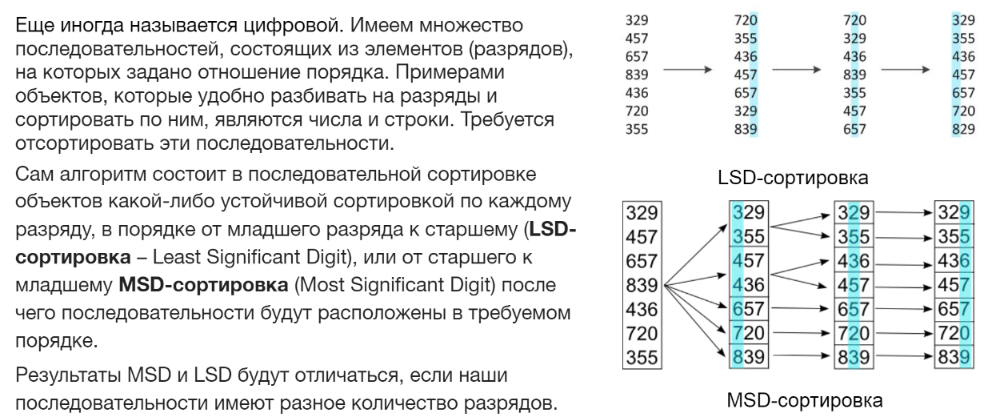

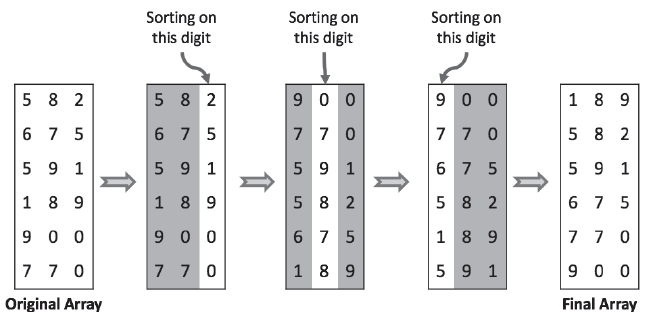

In [34]:
def help_sort(arr, exp):
    n = len(arr)
    res = [0] * n  
    count = [0] * 10
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        res[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1
    for i in range(n):
        arr[i] = res[i]
    print(f"После сортировки по разряду {exp}: {arr}")


def radix_sort(arr):
    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        help_sort(arr, exp)
        exp *= 10
nums = [9, 7, 6, 15, 16, 5, 10, 11]
radix_sort(nums)
print(nums)

После сортировки по разряду 1: [10, 11, 15, 5, 6, 16, 7, 9]
После сортировки по разряду 10: [5, 6, 7, 9, 10, 11, 15, 16]
[5, 6, 7, 9, 10, 11, 15, 16]


Рассмотрим help_sort

In [45]:
15 // 1 

15

In [47]:
15 // 10

1

In [49]:
15 % 1

0

In [51]:
15 % 10

5

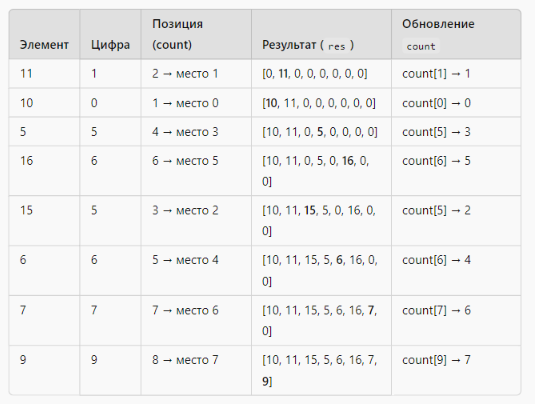

In [56]:
nums = [9, 7, 6, 15, 16, 5, 10, 11]
n = len(str(max(nums)))
exp = 10
for i in range(n):
    m = [[] for k in range(exp)] 
    for x in nums:
        figure = x // 10**i % 10
        m[figure].append(x)
    nums = []
    for k in range(exp):
        nums = nums + m[k]
print(nums)

[5, 6, 7, 9, 10, 11, 15, 16]


### Метод сортировки внутри поразрядной сортировки:
Первая реализация (с функцией help_sort):
Использует алгоритм сортировки подсчётом (counting sort) для сортировки по каждому разряду. Counting sort является устойчивым алгоритмом, что важно для правильной работы radix sort.

Вторая реализация (с использованием списков m):
Использует подход, похожий на bucket sort, где для каждого разряда создаётся отдельный список (bucket), и числа распределяются по ним. Затем эти списки объединяются.

### Производительность:
Первая реализация:
Эффективнее для больших данных, так как counting sort работает за линейное время по числу элементов и размеру диапазона чисел.

Вторая реализация:
Может быть менее эффективной из-за необходимости создания и объединения нескольких списков на каждом шаге.

## Merge sort

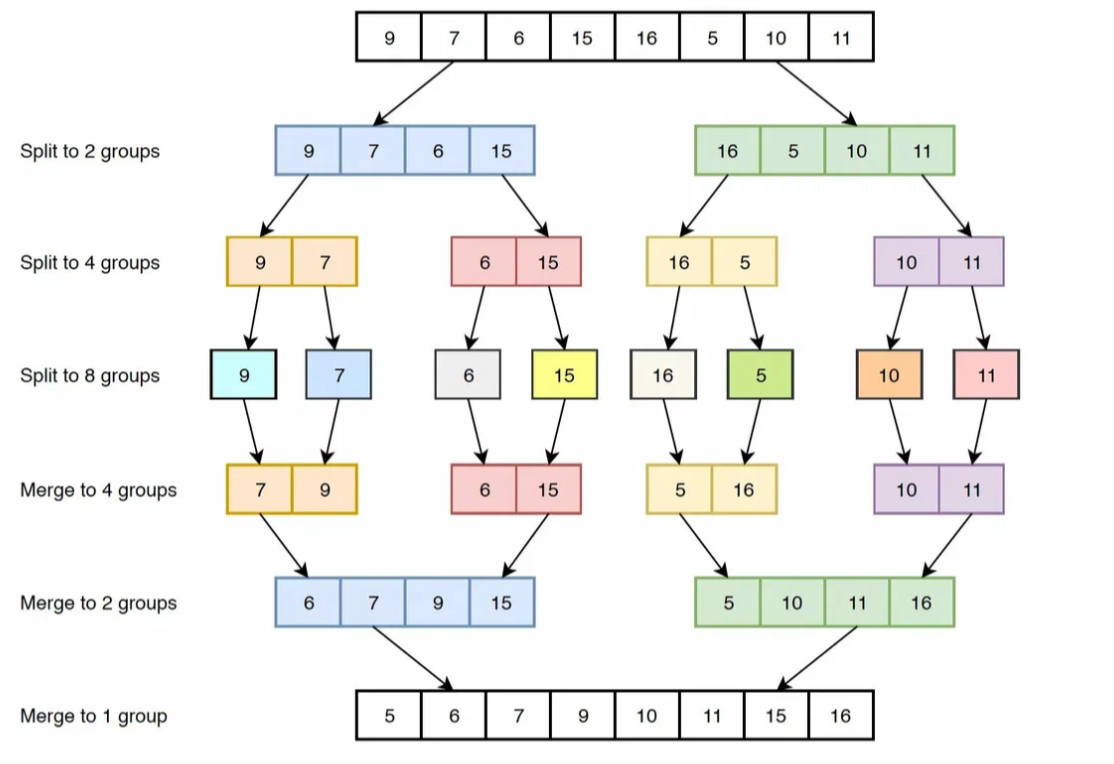

In [21]:
def merge_sort(nums): 
    if len(nums) > 1:  
        mid = len(nums)//2
        left = nums[:mid] 
        right = nums[mid:]
        left = merge_sort(left)  
        right = merge_sort(right)  

        i = j = k = 0

        while i < len(left) and j < len(right): 
            if left[i] < right[j]: 
                nums[k] = left[i] 
                i+=1
            else: 
                nums[k] = right[j] 
                j+=1
            k+=1
            
        while i < len(left): 
            nums[k] = left[i] 
            i+=1
            k+=1

        while j < len(right): 
            nums[k] = right[j] 
            j+=1
            k+=1
 
    return nums 
    
nums = [9, 7, 6, 15, 16, 5, 10, 11]

merge_sort(nums)
print(nums)

[5, 6, 7, 9, 10, 11, 15, 16]


## Heap

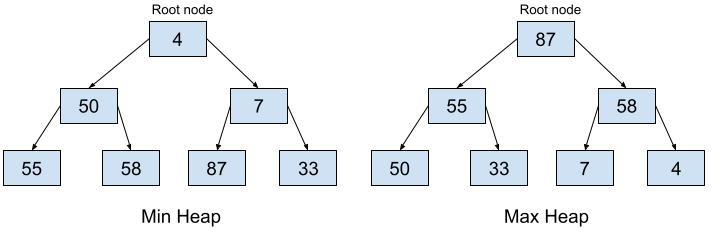

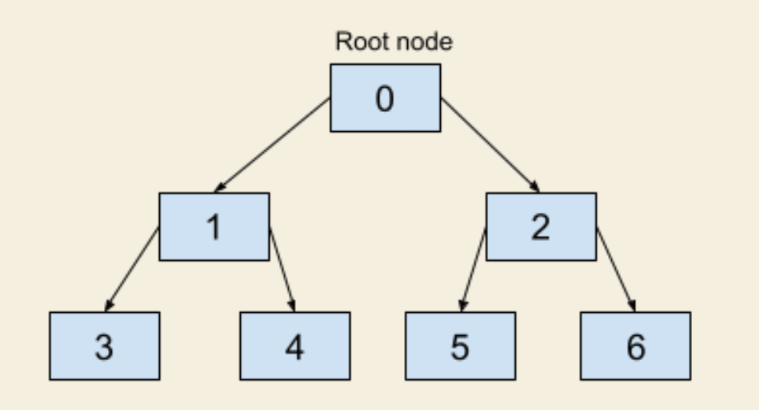

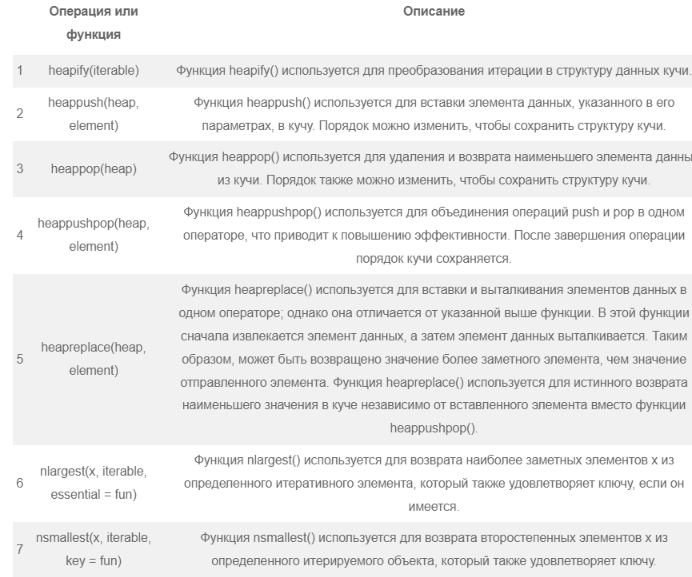

In [161]:
import heapq

nums = [15, 7, 9, 4, 13]
heapq.heapify(nums)
print(nums) 

[4, 7, 9, 15, 13]


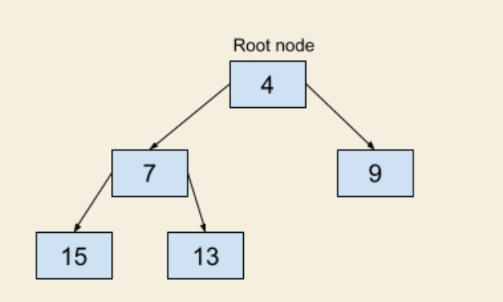

In [156]:
nums = [9, 7, 6, 15, 16, 5, 10, 11]
heapq.heapify(nums)
print(nums) 
heapq.heappush(nums, 20)
print(nums) 
heapq.heappush(nums, 10)
print(nums) 

[5, 7, 6, 11, 16, 9, 10, 15]
[5, 7, 6, 11, 16, 9, 10, 15, 20]
[5, 7, 6, 11, 10, 9, 10, 15, 20, 16]


Нарисуйте эти кучи у доски

почему именно такая куча на картинке?

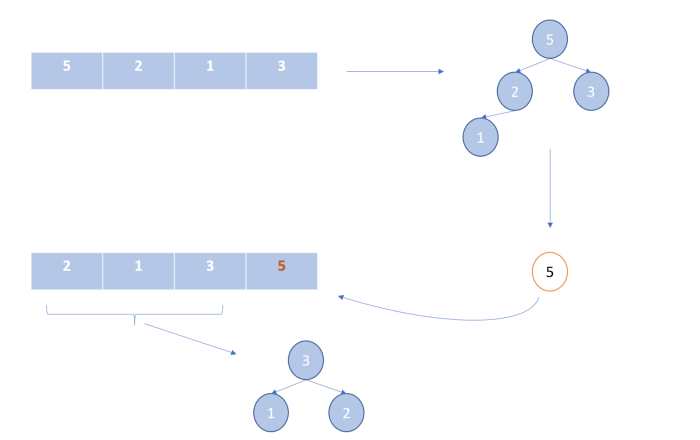

In [147]:
def heapify(array, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and array[i] < array[l]:
        largest = l
    if r < n and array[largest] < array[r]:
        largest = r

    if largest != i:
        print(f"Обмен {array[i]} и {array[largest]}")
        array[i], array[largest] = array[largest], array[i]
        heapify(array, n, largest)


def heapSort(array):
    n = len(array)
    print(f"\nПостроение кучи:")
    for i in range(n // 2, -1, -1):
        heapify(array, n, i)
        print(f"Куча после heapify({i}): {array}")

    print(f"\nПроцесс сортировки:")
    for i in range(n - 1, 0, -1):
        print(f"\nСмена {array[0]} (корень) с {array[i]} (последний элемент)")
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)
        print(f"Массив после перестройки кучи: {array}")

    return array

nums = [9, 7, 6, 15, 16, 5, 10, 11]
heapSort(nums)
print(f"\nОтсортированный массив: {nums}")


Построение кучи:
Куча после heapify(4): [9, 7, 6, 15, 16, 5, 10, 11]
Куча после heapify(3): [9, 7, 6, 15, 16, 5, 10, 11]
Обмен 6 и 10
Куча после heapify(2): [9, 7, 10, 15, 16, 5, 6, 11]
Обмен 7 и 16
Куча после heapify(1): [9, 16, 10, 15, 7, 5, 6, 11]
Обмен 9 и 16
Обмен 9 и 15
Обмен 9 и 11
Куча после heapify(0): [16, 15, 10, 11, 7, 5, 6, 9]

Процесс сортировки:

Смена 16 (корень) с 9 (последний элемент)
Обмен 9 и 15
Обмен 9 и 11
Массив после перестройки кучи: [15, 11, 10, 9, 7, 5, 6, 16]

Смена 15 (корень) с 6 (последний элемент)
Обмен 6 и 11
Обмен 6 и 9
Массив после перестройки кучи: [11, 9, 10, 6, 7, 5, 15, 16]

Смена 11 (корень) с 5 (последний элемент)
Обмен 5 и 10
Массив после перестройки кучи: [10, 9, 5, 6, 7, 11, 15, 16]

Смена 10 (корень) с 7 (последний элемент)
Обмен 7 и 9
Массив после перестройки кучи: [9, 7, 5, 6, 10, 11, 15, 16]

Смена 9 (корень) с 6 (последний элемент)
Обмен 6 и 7
Массив после перестройки кучи: [7, 6, 5, 9, 10, 11, 15, 16]

Смена 7 (корень) с 5 (последний э

# Все кучи

### Бинарная

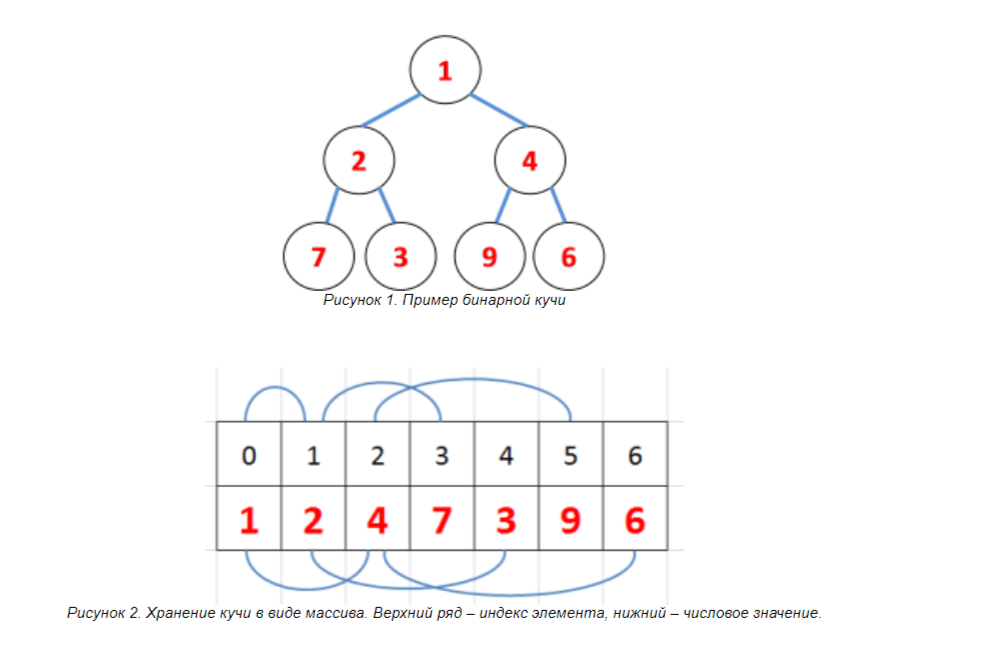

Новый элемент добавляется в конец массива. При этом может произойти нарушения целостности кучи. Если целостность кучи нарушена ровно одним элементом, то для восстановления общей целостности необходимо сделать просеивание данного элемента вверх (shift up) или вниз (shift down). В данном случае нужно применить просеивание вверх (рис. 3). Для ее проведения необходимо следовать только одному правилу: «Если текущий элемент меньше своего родителя, то они меняются местами в куче».

Далее процесс повторяется для нового положения текущего элемента до тех пор, пока он меньше своего отца или до тех пор, пока текущий элемент не станет корнем кучи. Понятно, что в худшем случае при просеивании вверх новый элемент совершит количество обменов равных высоте дерева. Т.к. дерево является бинарным, то сложность данной операции O(log(N)).

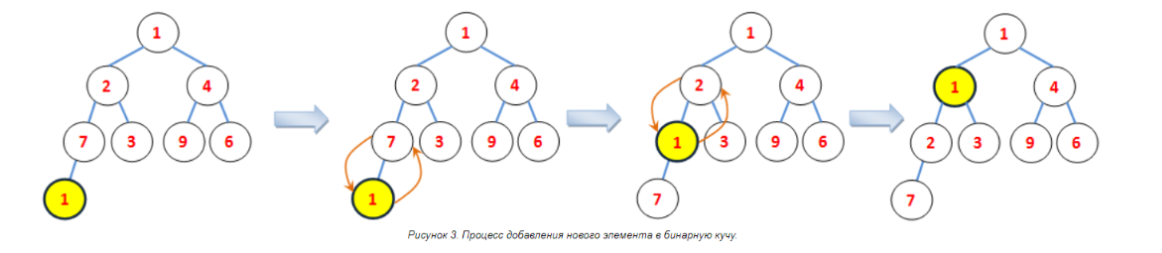

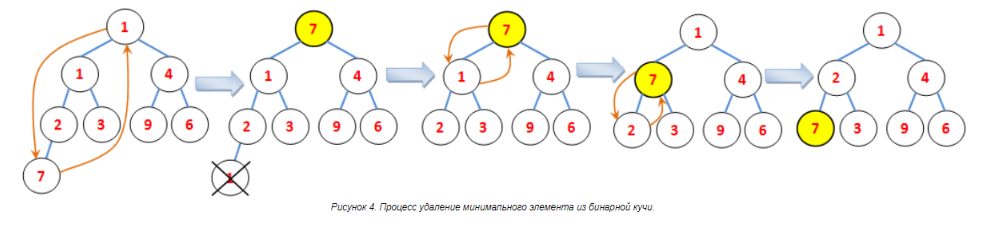

### Биномиальная куча
Впервые данная структура данных была описана в работе Жана Вильемина в 1978.

Прежде чем рассмотреть устройство биномиальной кучи, введем понятие пирамидального дерева

Пирамидальное дерево – это дерево размером 2N, все элементы которого, кроме корня и листьев, имеют ровно два дочерних элемента. При этом корневой элемент всегда имеет левого потомка, кроме вырожденного случая, когда дерево состоит из одного элемента. Для каждого элемента дерева выполняется правило: «Все элементы левого поддерева текущего элемента не меньше его самого».


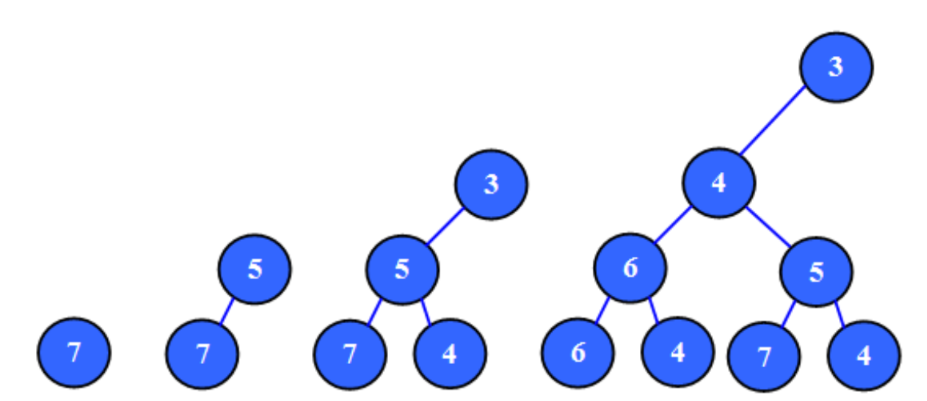

Биномиальная куча – это структура данных, которая содержит в себе набор пирамидальных деревьев попарно различного размера. Можно провести прямую аналогию между размерами пирамидальных деревьев в биномиальной куче и двоичным представлением числа. Т.е. если известно, что биномиальная куча содержит 11 элементов, то это значит, в ее состав входят пирамидальные деревья с размерами 8, 2 и 1.

Два пирамидальных дерева A и B можно объединить только в том случае, если у них одинаковый размер. Для определенности считаем, что корень дерева A меньше корня дерева B. При этом корнем объединенного дерева будет корень дерева A, а его левое поддерево станет правым поддеревом корневого элемента дерева B, а само дерево B станет левым поддеревом корневого элемента A

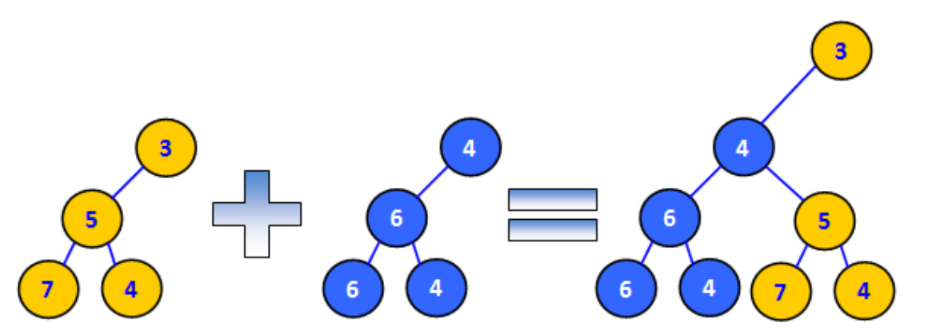

При удалении минимального элемента кучи сначала необходимо найти пирамидальное дерево, корнем которого он является, и исключить это дерево из общего списка деревьев биномиальной кучи. После чего необходимо разбить исходное дерево на log2(count) пирамидальных деревьев (где count – количество элементов дерева), которые являются поддеревьями исходного дерева. Эти деревья будут иметь размеры, равные степени двойки, а также будут попарно различны.

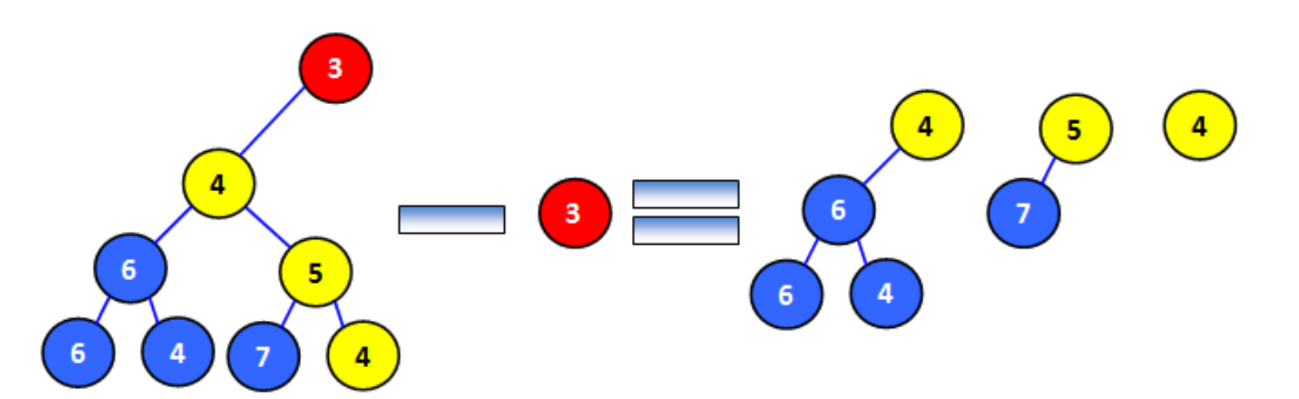

Изменение элемента может привести к нарушению целостности пирамидального дерева. Для восстановления целостности, как и в бинарной куче, необходимо применить операцию просеивания вверх или вниз. Просеивание вниз пирамидального дерева полностью идентично просеиванию вниз бинарной кучи. Просеивание вверх осуществляется по немного другому правилу.

При просеивании вверх ищется такой родительский элемент, для которого обновленный элемент находится в левом поддереве, и если обновленное значение меньше родительского, то они меняются местами. Данное действие повторяется для нового положения обновленного элемента.

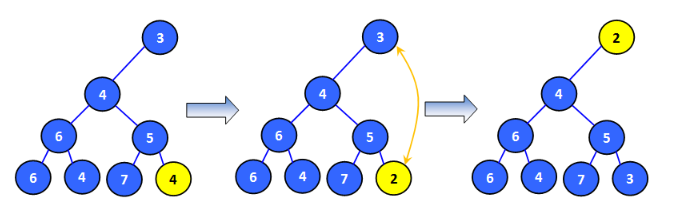

### Фибоначчиева куча

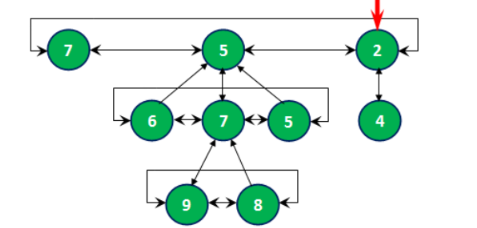

Фибоначчиева куча, как и биномиальная, представляет собой набор деревьев. Только на этот раз фибоначчиевых деревьев. Фибоначчиево дерево – это k-ичное дерево, для каждого элемента которого выполняется правило: «дочерний элемент не превышает своего родителя». Корни фибоначчиевых деревьев хранятся в виде кольцевого списка. Также все дочерние элементы, имеющие общего предка, хранятся в виде кольцевого списка, поэтому элементу-родителю не нужно хранить ссылки на всех своих потомков. Для этого достаточно знать информацию только об одном из них

Каждый узел фибоначчиева дерева, помимо указателей на левого, правого брата, на родителя и на одного из своих сыновей содержит информацию о количестве дочерних узлов. Эта информация понадобится в операции удаления минимального элемента в процессе уплотнения кучи.

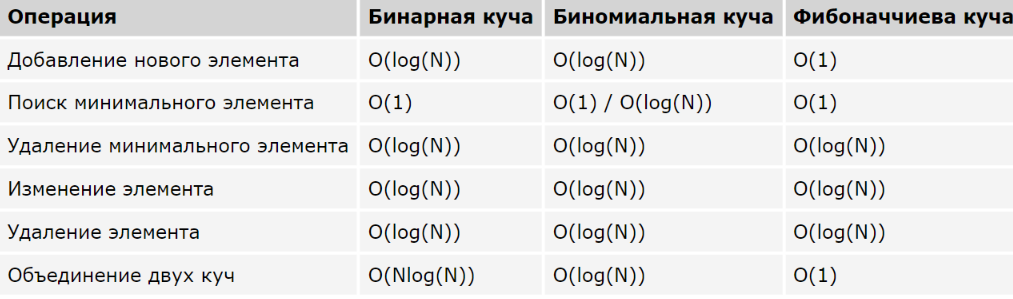

### Ссылки

# Графы

Граф – это набор взаимосвязанных элементов.

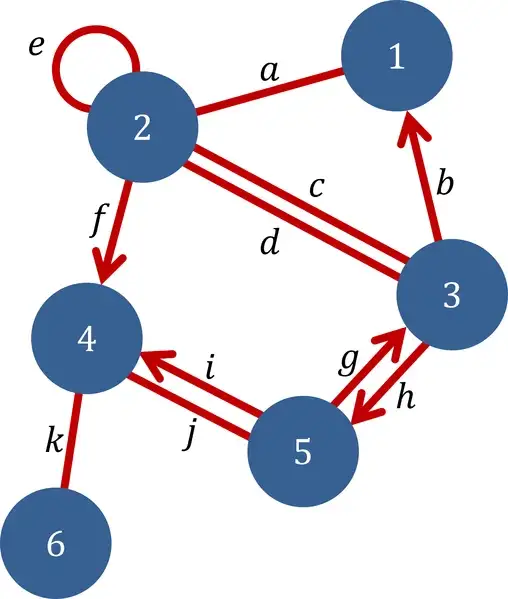

Элементы (называемые узлами) могут содержать любую информацию и быть связанными любым образом (с помощью рёбер) делает граф наиболее обобщённой структурой данных. 

### Некоторые термины

Смежность вершин - две вершины называются смежными, если они инцидентны одному ребру.

Смежность рёбер - два ребра называются смежными, если они инцедентны одной вершине.

Говоря проще - две вершины смежные, если они соединены ребром, два ребра смежные - если они соединены вершиной.

Петля - ребро, инцидентное одной вершине. Ребро, которое замыкается на одной вершине. 

Псевдограф - граф с петлями. С такими графами не очень удобно работать, потому что переходя по петле мы остаёмся в той же самой вершине, поэтому у него есть своё название

Кратные рёбра - рёбра, имеющие одинаковые концевые вершины, по другому их называют ещё параллельными.

Мультиграф - граф с кратными рёбрами.

Псевдомультиграф - граф с петлями и кратными рёбрами

Степень вершины - это количество рёбер, инцидентных указанной вершине. По-другому - количество рёбер, исходящих из вершины. Петля увеливает степень вершины на 2.

Изолированная вершина - вершина с нулевой степенью.

Висячая вершина - вершина со степенью 1.

Подграф. Если в исходном графе выделить несколько вершин и несколько рёбер (между выбранными вершинами), то мы получим подграф исходного графа. 

Регулярный граф - граф, в котором степени всех вершин одинаковые.

Планарный граф. Если граф можно разместить на плоскости таким образом, чтобы рёбра не пересекались, то он называется “планарным графом” или “плоским графом”.

Путь или Маршрут - это последовательность смежных рёбер. Обычно путь задаётся перечислением вершин, по которым он пролегает.

Длина пути - количество рёбер в пути.

Цепь - маршрут без повторяющихся рёбер.

Простая цепь - цепь без повторяющихся вершин.

Дерево - связный граф без циклов. Между любыми двумя вершинами дерева существует единственный путь.

Цикл или Контур - цепь, в котором последняя вершина совпадает с первой. 

Длина цикла - количество рёбер в цикле.

### Список смежности

Каждая вершина хранит список смежных вершин.

In [224]:
graph = {
    0: [1, 2],   
    1: [0, 2, 3], 
    2: [0, 1, 3],
    3: [1, 2]    
}

print("Соседи вершины 1:", graph[1])

Соседи вершины 1: [0, 2, 3]


### Матрица смежности 

Граф представляется квадратной матрицей n x n, где n — количество узлов.
Если graph[i][j] = 1, то есть ребро из i в j, иначе 0.

In [230]:
graph = [
    [0, 1, 1, 0], 
    [1, 0, 1, 1],  
    [1, 1, 0, 1],  
    [0, 1, 1, 0]  
]

if graph[1][3] == 1:
    print("Есть ребро между 1 и 3")
else:
    print("Нет ребра между 1 и 3")

Есть ребро между 1 и 3


### Использование networkx
Позволяет легко создавать, визуализировать и анализировать графы.

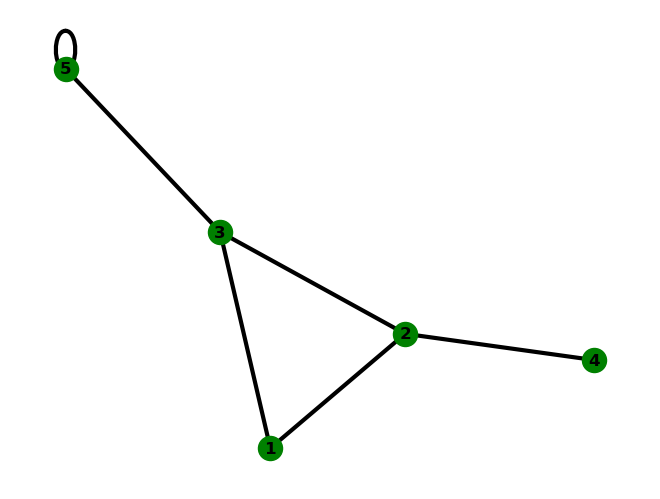

In [233]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

nodes = [1, 2, 3, 4, 5]
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (5, 5)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G, with_labels=True, font_weight='bold', 
        node_color='green', edge_color='black', width=3)
plt.show()

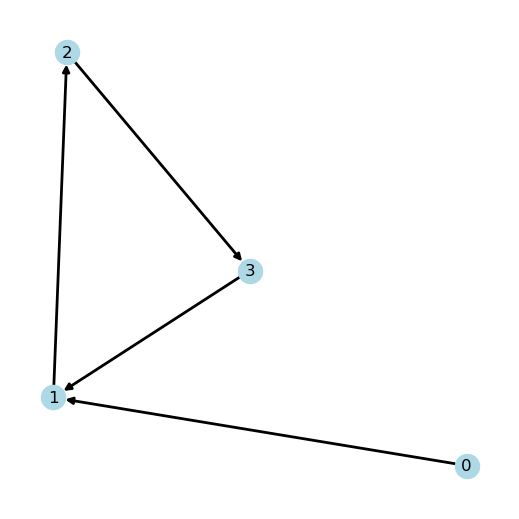

In [249]:
G = nx.DiGraph()
edges = [(0, 1), (1, 2), (2, 3), (3, 1)] #попробуйте добавить еще (1,0) и посмотреть, что происходит)))
G.add_edges_from(edges)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', width=2, arrows=True)
plt.show()

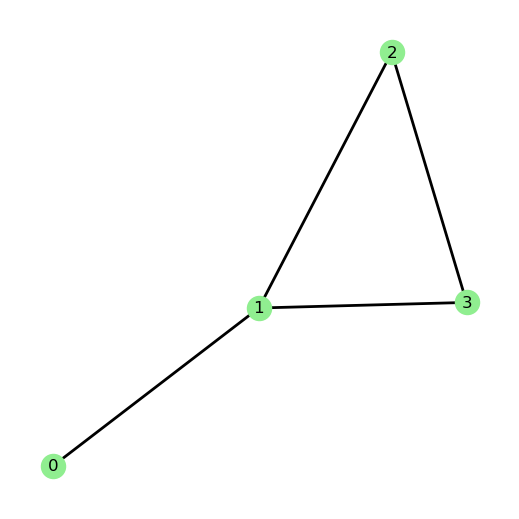

In [247]:
G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 3), (3, 1)]  # Автоматически считается двусторонним
G.add_edges_from(edges)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='black', width=2)
plt.show()

### BFS VS DFS

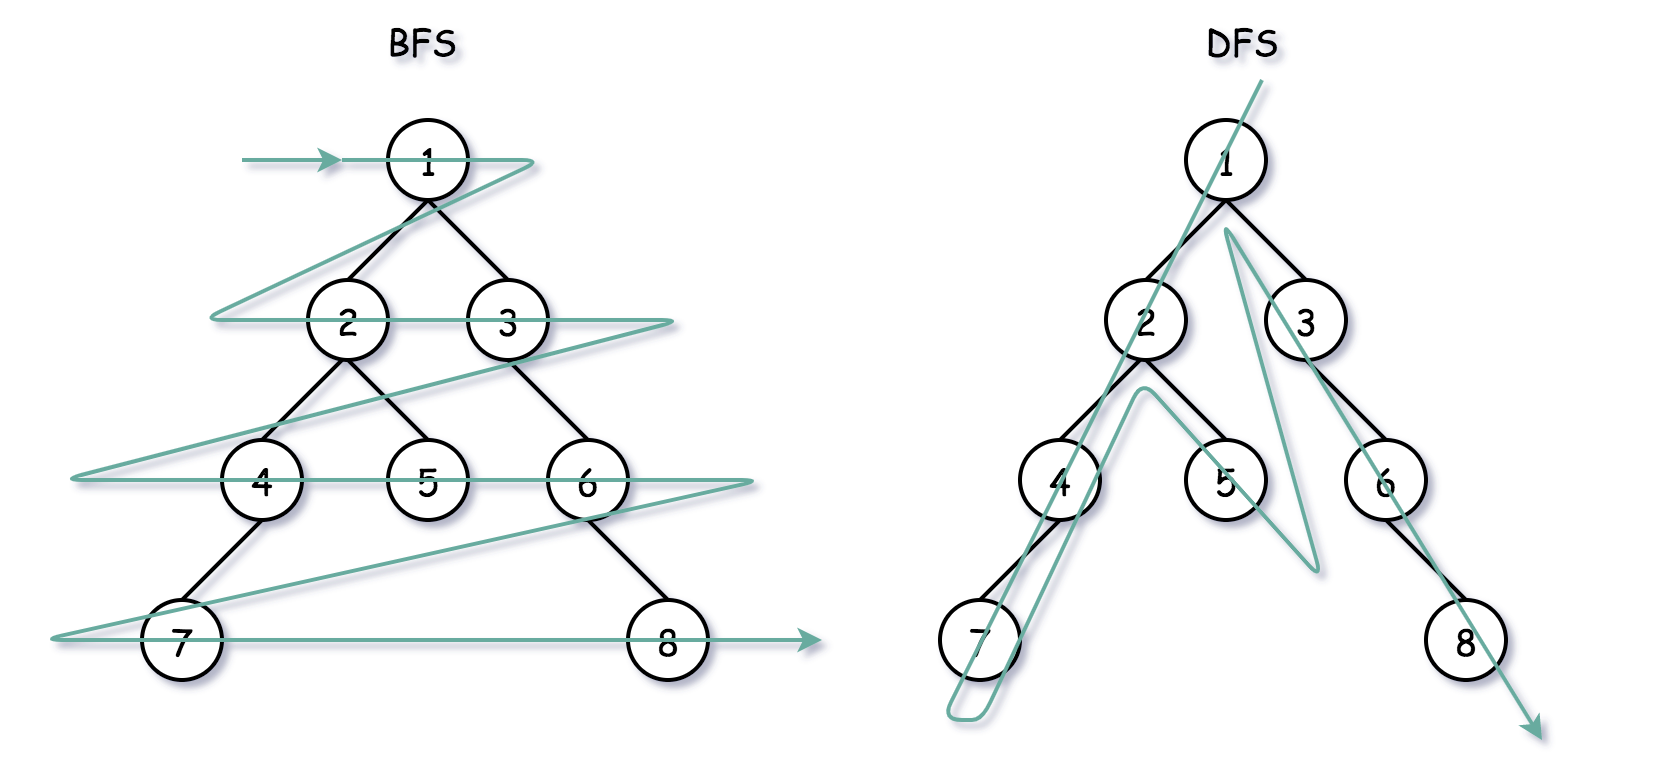

In [259]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A'],
    'D': ['B']
}


def dfs_list(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    
    for neighbor in graph[start]:
        if neighbor not in path:
            new_path = dfs_list(graph, neighbor, end, path)
            if new_path:
                return new_path
    
    return None

path = dfs_list(graph, 'A', 'D')
print("Путь:", path) 

Путь: ['A', 'B', 'D']


In [280]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            queue.extend(graph[node])

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    
    if start not in visited:
        print(start, end=" ")
        visited.add(start)
        for neighbor in graph[start]:
            dfs(graph, neighbor, visited)

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E']
}

print("BFS:")
bfs(graph, 'A')

print("\nDFS:")
dfs(graph, 'A')


BFS:
A B C D E F G H 
DFS:
A B D E H C F G 

Но обычно не все так просто

In [ ]:
# Список смежности с весами
graph = {
    'A': [('B', 10), ('C', 15)],
    'B': [('A', 10), ('D', 12)],
    'C': [('A', 15), ('D', 10)],
    'D': [('B', 12), ('C', 10)]
}


# Матрица смежности с весами
graph = [
    [0, 10, 15, 0],  # A → B (10), A → C (15)
    [10, 0, 0, 12],  # B → A (10), B → D (12)
    [15, 0, 0, 10],  # C → A (15), C → D (10)
    [0, 12, 10, 0]   # D → B (12), D → C (10)
]

In [274]:
def my_path(graph, start, end, path=None, cost=0):
    if path is None:
        path = []
    path = path + [start]
    
    if start == end:
        return path, cost
    
    if start not in graph:
        return None, float('inf')
    
    shortest_path = None
    min_cost = float('inf')
    
    for node, weight in graph[start]:
        if node not in path: 
            new_path, new_cost = my_path(graph, node, end, path, cost + weight)
            shortest_path = new_path
            min_cost = new_cost
    
    return shortest_path, min_cost

graph = {
    'A': [('B', 2)],
    'B': [('C', 3)],
    'C': [('D', 4)],
    'D': [('E', 5)],
    'E': []
}

start_node = 'A'
end_node = 'E'
path, total_cost = my_path(graph, start_node, end_node)
print("Найденный путь:", path)
print("Общая стоимость пути:", total_cost)

Найденный путь: ['A', 'B', 'C', 'D', 'E']
Общая стоимость пути: 14


Верно ли работает код?

In [272]:
def my_path(graph, start, end, path=None, cost=0):
    if path is None:
        path = []
    path = path + [start]
    
    if start == end:
        return path, cost
    
    if start not in graph:
        return None, float('inf')
    
    shortest_path = None
    min_cost = float('inf')
    
    for node, weight in graph[start]:
        if node not in path:  # зачем эта проверка?
            new_path, new_cost = my_path(graph, node, end, path, cost + weight)
            if new_path and new_cost < min_cost:
                shortest_path = new_path
                min_cost = new_cost
    
    return shortest_path, min_cost

graph = {
    'A': [('B', 2)],
    'B': [('C', 3), ('E', 10)],
    'C': [('D', 4)],
    'D': [('E', 5)],
    'E': []
}

start_node = 'A'
end_node = 'E'
path, total_cost = my_path(graph, start_node, end_node)
print("Найденный путь:", path)
print("Общая стоимость пути:", total_cost)


Найденный путь: ['A', 'B', 'E']
Общая стоимость пути: 12
